# Сравнение Bicleaner, LASER и LaBSE

In [2]:
import numpy as np
import pandas as pd

In [3]:
sourcefile = '5K_random_annotated.txt'  # annotated 5K sentence pairs
cos_sim_file_labse = '5K_labse_cos_sim.txt'
cos_sim_laser = '5K_laser_cos_sims.txt'
bicleaner_proba = '5K_bicleaner_scores.txt'  # Bicleaner probabalities

In [4]:
# читаем размеченный файл - английский текст, русский текст, лейбл
en_lst = []
ru_lst = []
label_lst = []
with open(sourcefile, 'r', encoding='utf-8') as in_f:
    in_f.readline()
    for line in in_f:
        _, en, ru, label = line.split('\t')
        en_lst.append(en.strip())
        ru_lst.append(ru.strip())
        label_lst.append(int(label.strip()))
for lst in en_lst, ru_lst, label_lst:
    print(len(lst))

5000
5000
5000


In [5]:
# создаеми датафрейм
sims_df = pd.DataFrame()
sims_df['en'] = en_lst
sims_df['ru'] = ru_lst
sims_df['label'] = label_lst
sims_df.shape

(5000, 3)

In [6]:
# читаем файл с вероятностиями, определенными Bicleaner-ом
# в файле 3 поля - англ. предл-е, русское и вероятность
bicleaner_proba_lst = []
with open(bicleaner_proba, 'r', encoding='utf-8') as in_f:
    for line in in_f:
        _, _, proba = line.split('\t')
        bicleaner_proba_lst.append(float(proba))

print(len(bicleaner_proba_lst))

5000


In [7]:
# читаем файлы с косинунсными сходствами из двух моделей
cos_sims_labse_lst = []
with open(cos_sim_file_labse, 'r', encoding='utf-8') as in_f:
    for num in in_f:
        cos_sims_labse_lst.append(float(num))

print(len(cos_sims_labse_lst))

cos_sims_laser_lst = []
with open(cos_sim_laser, 'r', encoding='utf-8') as in_f:
    for num in in_f:
        cos_sims_laser_lst.append(float(num))

print(len(cos_sims_laser_lst))

5000
5000


In [8]:
# Добавляем косинусные сходства и вероятности в датафрейм
sims_df['bicleaner'] = bicleaner_proba_lst
sims_df['laser'] = cos_sims_laser_lst
sims_df['labse'] = cos_sims_labse_lst

print(sims_df.shape)
print(sims_df.dtypes)
sims_df.head()

(5000, 6)
en            object
ru            object
label          int64
bicleaner    float64
laser        float64
labse        float64
dtype: object


,en,ru,label,bicleaner,laser,labse
0,Also assisted with the drafting of the Penal C...,Работал также над составлением уголовного коде...,1,0.680,0.949436,0.850752
1,It is recommended that this category of prefab...,Рекомендуется обеспечить перевозку сборных дом...,1,0.678,0.883705,0.779060
2,I am deeply appreciative of our privileged par...,Я очень высоко ценю наше привилегированное пар...,1,0.916,0.935083,0.912271
3,The Commission further took note of the recomm...,Комиссия далее приняла к сведению рекомендацию...,1,0.820,0.983429,0.938459
4,6. The General Assembly considers that the pos...,6. Генеральная Ассамблея считает целесообразны...,1,0.748,0.965482,0.882851


In [9]:
# сохраняем датафрейм на будущее
sims_df.to_csv('5K_unpc_sample.txt', sep='\t')

In [10]:
# проверка читаемости файла с сохраненным датафреймом
test_db = pd.read_csv('5K_unpc_sample.txt', sep='\t', header=0, index_col=0)
print(test_db.shape)
print(test_db.dtypes)

(5000, 6)
en            object
ru            object
label          int64
bicleaner    float64
laser        float64
labse        float64
dtype: object


In [11]:
test_db.head()

,en,ru,label,bicleaner,laser,labse
0,Also assisted with the drafting of the Penal C...,Работал также над составлением уголовного коде...,1,0.680,0.949436,0.850752
1,It is recommended that this category of prefab...,Рекомендуется обеспечить перевозку сборных дом...,1,0.678,0.883705,0.779060
2,I am deeply appreciative of our privileged par...,Я очень высоко ценю наше привилегированное пар...,1,0.916,0.935083,0.912271
3,The Commission further took note of the recomm...,Комиссия далее приняла к сведению рекомендацию...,1,0.820,0.983429,0.938459
4,6. The General Assembly considers that the pos...,6. Генеральная Ассамблея считает целесообразны...,1,0.748,0.965482,0.882851


In [12]:
test_db.tail()

,en,ru,label,bicleaner,laser,labse
4995,All were ozone-depleting substances and greenh...,Все они являются озоноразрушающими веществами ...,1,0.682,0.952479,0.833811
4996,"Red foxes in urban, rural areas in Belgium had...",У красных лис в городских и сельских районах Б...,1,0.752,0.928296,0.898860
4997,Having completed the assessment of alternative...,завершив оценку альтернатив перфтороктановой с...,1,0.744,0.962808,0.912102
4998,Annex II Register of information supplied by p...,"Реестр сведений, представляемых Сторонами, при...",1,0.504,0.935874,0.827939
4999,The Office participated in training exercises ...,В течение года Управление принимало участие в ...,1,0.788,0.919791,0.868357


In [ ]:
# скачать датафрейм с размеченным набором данных и сходствами
# from google.colab import files

# files.download('5K_unpc_sample.txt')

In [ ]:
# Разбивка косинусных сходств по корзинкам для каждой модели
groups_bicleaner = sims_df.groupby(pd.cut(x=sims_df['bicleaner'], bins=list(np.arange(0, 1.1, 0.1))))

groups_bicleaner.size()

bicleaner
(0.0, 0.1]       9
(0.1, 0.2]      15
(0.2, 0.3]      52
(0.3, 0.4]     120
(0.4, 0.5]     284
(0.5, 0.6]     451
(0.6, 0.7]     872
(0.7, 0.8]    1307
(0.8, 0.9]    1394
(0.9, 1.0]     496
dtype: int64

In [ ]:
groups_laser = sims_df.groupby(pd.cut(x=sims_df['laser'], bins=list(np.arange(0, 1.1, 0.1))))

groups_laser.size()

laser
(0.0, 0.1]       0
(0.1, 0.2]       0
(0.2, 0.3]       2
(0.3, 0.4]       1
(0.4, 0.5]       3
(0.5, 0.6]       9
(0.6, 0.7]      25
(0.7, 0.8]     143
(0.8, 0.9]    1216
(0.9, 1.0]    3601
dtype: int64

In [ ]:
groups_labse = sims_df.groupby(pd.cut(x=sims_df['labse'], bins=list(np.arange(0, 1.1, 0.1))))

groups_labse.size()

labse
(0.0, 0.1]       0
(0.1, 0.2]       4
(0.2, 0.3]       5
(0.3, 0.4]       7
(0.4, 0.5]      20
(0.5, 0.6]      34
(0.6, 0.7]     122
(0.7, 0.8]     684
(0.8, 0.9]    2975
(0.9, 1.0]    1149
dtype: int64

In [ ]:
# Таблица 13 – Распределение классов, к которым отнесены пары предложений из 
# случайной выборки, состоящей из 5 тысяч примеров, по диапазонам 
# косинусных сходств и вероятностям

def count_labels(label):
    def return_func(df):
        return sum(df['label'] == label)
    return return_func


# для модели Bicleaner
labels_counts = []
for label in (-1, 0, 1):
    counter_func = count_labels(label)
    temp_res = groups_bicleaner.apply(counter_func)
    labels_counts.append(temp_res)
print('BICLEANER')
print(labels_counts)

# для модели Laser
labels_counts = []
for label in (-1, 0, 1):
    counter_func = count_labels(label)
    temp_res = groups_laser.apply(counter_func)
    labels_counts.append(temp_res)
print('LASER')
print(labels_counts)

# для модели LaBSE
labels_counts = []
for label in (-1, 0, 1):
    counter_func = count_labels(label)
    temp_res = groups_labse.apply(counter_func)
    labels_counts.append(temp_res)
print('LaBSE')
print(labels_counts)



BICLEANER
[bicleaner
(0.0, 0.1]     1
(0.1, 0.2]     5
(0.2, 0.3]     7
(0.3, 0.4]     4
(0.4, 0.5]    12
(0.5, 0.6]     5
(0.6, 0.7]     9
(0.7, 0.8]     6
(0.8, 0.9]     2
(0.9, 1.0]     0
dtype: int64, bicleaner
(0.0, 0.1]     6
(0.1, 0.2]     3
(0.2, 0.3]    10
(0.3, 0.4]    10
(0.4, 0.5]     9
(0.5, 0.6]     2
(0.6, 0.7]     3
(0.7, 0.8]     2
(0.8, 0.9]     0
(0.9, 1.0]     0
dtype: int64, bicleaner
(0.0, 0.1]       2
(0.1, 0.2]       7
(0.2, 0.3]      35
(0.3, 0.4]     106
(0.4, 0.5]     263
(0.5, 0.6]     444
(0.6, 0.7]     860
(0.7, 0.8]    1299
(0.8, 0.9]    1392
(0.9, 1.0]     496
dtype: int64]
LASER
[laser
(0.0, 0.1]     0
(0.1, 0.2]     0
(0.2, 0.3]     0
(0.3, 0.4]     0
(0.4, 0.5]     0
(0.5, 0.6]     2
(0.6, 0.7]     4
(0.7, 0.8]    14
(0.8, 0.9]    24
(0.9, 1.0]     7
dtype: int64, laser
(0.0, 0.1]     0
(0.1, 0.2]     0
(0.2, 0.3]     2
(0.3, 0.4]     1
(0.4, 0.5]     3
(0.5, 0.6]     6
(0.6, 0.7]     6
(0.7, 0.8]    16
(0.8, 0.9]    10
(0.9, 1.0]     1
dtype: int64, 

In [ ]:
# посмотреть те 2 предложения, которые Bicleaner отнес к диапазону 0,0-0,1 
# но которые относятся к хорошим предложениям (класс 1)
mask =  ((sims_df['bicleaner'] > 0.0) & (sims_df['bicleaner'] <= 0.1) & (sims_df['label'] == 1))
sims_df[mask]

,en,ru,label,bicleaner,laser,labse
3904,Promoting self-employment will assist that pri...,Поддержке этой деятельности способствуют также...,1,0.034,0.652404,0.505153
4212,Substantive session of the Economic and Social...,Основная сессия ЭКОСОС,1,0.064,0.913325,0.521788


In [ ]:
print(sims_df.loc[3904]['en'])
print(sims_df.loc[3904]['ru'])

Promoting self-employment will assist that primary feature.
Поддержке этой деятельности способствуют также меры, которые мы принимаем для развития самостоятельной предпринимательской деятельности.


In [ ]:
print(sims_df.loc[4212]['en'])
print(sims_df.loc[4212]['ru'])

Substantive session of the Economic and Social Council
Основная сессия ЭКОСОС


In [ ]:
# Если максимизировать Precision, то модели найдут  2, 9 и 14 плохих предложений
# соответственно. Воходят ли 2 из них в 9 и 14?

mask =  ((sims_df['bicleaner'] > 0.0) & (sims_df['bicleaner'] <= 0.03) & (sims_df['label'] == 0))
sims_df[mask]

,en,ru,label,bicleaner,laser,labse
518,B. Right of peoples to dispose of their natura...,естественными ресурсами,0,0.026,0.733056,0.497456
3525,This document sets out the institutional struc...,Принимая эту,0,0.002,0.277336,0.187982


In [ ]:
print(sims_df.loc[518]['en'])
print(sims_df.loc[518]['ru'])

B. Right of peoples to dispose of their natural resources
естественными ресурсами


In [ ]:
print(sims_df.loc[3525]['en'])
print(sims_df.loc[3525]['ru'])

This document sets out the institutional structure under THE PEP to implement the workplan through these mechanisms as well as guidelines for the role of the Steering Committee, the Bureau and the secretariat as mandated by the Third High-level Meeting.
Принимая эту


In [ ]:
mask =  ((sims_df['laser'] > 0.0) & (sims_df['laser'] <= 0.58) & (sims_df['label'] == 0))
sims_df[mask]

,en,ru,label,bicleaner,laser,labse
227,2966 and,Этот несанкционированный полет был совершен в ...,0,0.238,0.246768,0.223070
237,Document MTN/GNS/W/145.,"рынков"" 22/.",0,0.222,0.488826,0.277265
973,"definitions in, A5-","FCA, см. Франко-перевозчик",0,0.424,0.556213,0.228623
2805,Saint Kitts and Nevis,"Комитет по политике в области развития, девята...",0,0.066,0.387828,0.161100
2904,SUPPLEANTS,1998 - 2001 годы: посольство Китая в Соединенн...,0,0.406,0.434809,0.132724
3447,- Emergency response is good for donors and go...,"Необходимость быстрой, многоплановой диагности...",0,0.176,0.541789,0.174659
3525,This document sets out the institutional struc...,Принимая эту,0,0.002,0.277336,0.187982
3759,Difference (%),В час (израильских шекелей),0,0.478,0.457724,0.376610
4378,It must be: well-formed,Кочаны цикория-витлуфа должны быть:,0,0.706,0.500279,0.377494


In [ ]:
mask =  ((sims_df['labse'] > 0.0) & (sims_df['labse'] <= 0.39) & (sims_df['label'] == 0))
sims_df[mask]

,en,ru,label,bicleaner,laser,labse
181,Population and Development*,народонаселению и развитиюПринята на 14-м плен...,0,0.050,0.595992,0.353882
227,2966 and,Этот несанкционированный полет был совершен в ...,0,0.238,0.246768,0.223070
237,Document MTN/GNS/W/145.,"рынков"" 22/.",0,0.222,0.488826,0.277265
448,(Thousands of United States dollars),Организация Объединенных Наций e/,0,0.380,0.715497,0.267762
810,Inter-fund balances receivable (note 7),Конвертируемая валюта (таблица 2.1),0,0.368,0.818387,0.361216
973,"definitions in, A5-","FCA, см. Франко-перевозчик",0,0.424,0.556213,0.228623
2011,A. States Members of the United Nations Commis...,1. Открытие сессии,0,0.054,0.589560,0.271230
2805,Saint Kitts and Nevis,"Комитет по политике в области развития, девята...",0,0.066,0.387828,0.161100
2904,SUPPLEANTS,1998 - 2001 годы: посольство Китая в Соединенн...,0,0.406,0.434809,0.132724
3447,- Emergency response is good for donors and go...,"Необходимость быстрой, многоплановой диагности...",0,0.176,0.541789,0.174659


In [ ]:
# mask =  ((sims_df['laser'] > 0.9) & (sims_df['laser'] <= 1.0) & (sims_df['label'] == 0))
# sims_df[mask]

# mask =  ((sims_df['laser'] > 0.9) & (sims_df['laser'] <= 1.0) & (sims_df['label'] == 0))
# sims_df[mask].to_csv('data/_09_10_0_laser')
# sims_df[mask]

# mask =  ((sims_df['labse'] > 0.7) & (sims_df['labse'] <= 0.8) & (sims_df['label'] == 0))
# sims_df[mask].to_csv('data/_07_08_0_labse')
# sims_df[mask]

# mask =  ((sims_df['labse'] > 0.3) & (sims_df['labse'] <= 0.4))
# sims_df[mask].to_csv('data/_03_04_all_labse')
# sims_df[mask]

# mask =  ((sims_df['laser'] > 0.5) & (sims_df['laser'] <= 0.6))
# sims_df[mask].to_csv('data/_05_06_all_laser')
# sims_df[mask]

# mask =  ((sims_df['labse'] > 0.7) & (sims_df['labse'] <= 0.8) & (sims_df['label'] == 0))
# sims_df[mask].to_csv('data/_07_08_0_labse.txt', sep='\t')
# sims_df[mask]

# mask =  ((sims_df['labse'] > 0.3) & (sims_df['labse'] <= 0.4))
# sims_df[mask].to_csv('data/_03_04_all_labse.txt', sep='\t')
# sims_df[mask]

# mask =  ((sims_df['laser'] > 0.9) & (sims_df['laser'] <= 1.0) & (sims_df['label'] == 0))
# sims_df[mask].to_csv('data/_09_10_0_laser.txt', sep='\t')
# sims_df[mask]

# mask =  ((sims_df['laser'] > 0.5) & (sims_df['laser'] <= 0.6))
# sims_df[mask].to_csv('data/_05_06_all_laser.txt', sep='\t')
# sims_df[mask]

In [ ]:
# test_db = pd.read_csv('data/5K_random_labeled_similarities.txt', sep='\t', header=0, index_col=0)
# test_db

In [ ]:
def get_pred_vs_act_df(sims_df, true_label, model, threshold):
    predicted_vs_true_df = pd.DataFrame()
    predicted_vs_true_df['Actual'] = sims_df[true_label]
    condition = sims_df[model] < threshold
    predicted_vs_true_df['Predicted'] = 1
    predicted_vs_true_df['Predicted'][condition] = 0
    
    return predicted_vs_true_df

threshold = 0.4
predicted_vs_true_df = get_pred_vs_act_df(
    sims_df,
    true_label='label',
    model='labse',
    threshold=threshold
    )

In [ ]:
def get_crosstab(predicted_vs_true_df):
    two_way_tab = pd.crosstab(index=predicted_vs_true_df['Predicted'],
                columns=predicted_vs_true_df['Actual'],
                margins=True,
                margins_name='Totals'
               )
    return two_way_tab

two_way_tab = get_crosstab(predicted_vs_true_df)
two_way_tab

Actual,-1,0,1,Totals
Predicted,,,,
0,1,14,1,16
1,50,31,4903,4984
Totals,51,45,4904,5000


In [ ]:
def get_scores(two_way_tab):
    try:
        TP = two_way_tab[0][0]
        # FP = two_way_tab[-1][0] + two_way_tab[1][0]
        FP = two_way_tab[1][0]  # ignore class -1
        FN = two_way_tab[0][1]
        # TN = two_way_tab[-1][1] + two_way_tab[1][1]
        TN = two_way_tab[1][1]  # ignore class -1
    except KeyError:
        return (0, 0, 0, 0, 0, 0, 0, 0)
    try:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)
        specificity = TN / (TN + FP)
        FDR = FP / (TP + FP)  # false_discovery_rate
    except ZeroDivisionError:
        return (0, 0, 0, 0, 0, 0, 0, 0)
    return precision, recall, f1, specificity, FDR, two_way_tab[-1][0], TP, FP

get_scores(two_way_tab)

(0.9333333333333333,
 0.3111111111111111,
 0.4666666666666667,
 0.9997960848287113,
 0.06666666666666667,
 1,
 14,
 1)

In [ ]:
# таблицы 14 и 15, и 25 и 26
predicted_vs_true_df = get_pred_vs_act_df(
    sims_df,
    true_label='label',
    model='bicleaner',
    threshold=0.06
    )
two_way_tab = get_crosstab(predicted_vs_true_df)
scores = get_scores(two_way_tab)
print(two_way_tab)
print(scores)

predicted_vs_true_df = get_pred_vs_act_df(
    sims_df,
    true_label='label',
    model='laser',
    threshold=0.60
    )
two_way_tab = get_crosstab(predicted_vs_true_df)
scores = get_scores(two_way_tab)
print(two_way_tab)
print(scores)

predicted_vs_true_df = get_pred_vs_act_df(
    sims_df,
    true_label='label',
    model='labse',
    threshold=0.41
    )
two_way_tab = get_crosstab(predicted_vs_true_df)
scores = get_scores(two_way_tab)
print(two_way_tab)
print(scores)

Actual     -1   0     1  Totals
Predicted                      
0           0   4     1       5
1          51  41  4903    4995
Totals     51  45  4904    5000
(0.8, 0.08888888888888889, 0.15999999999999998, 0.9997960848287113, 0.2, 0, 4, 1)
Actual     -1   0     1  Totals
Predicted                      
0           2  12     1      15
1          49  33  4903    4985
Totals     51  45  4904    5000
(0.9230769230769231, 0.26666666666666666, 0.4137931034482759, 0.9997960848287113, 0.07692307692307693, 2, 12, 1)
Actual     -1   0     1  Totals
Predicted                      
0           2  16     1      19
1          49  29  4903    4981
Totals     51  45  4904    5000
(0.9411764705882353, 0.35555555555555557, 0.5161290322580645, 0.9997960848287113, 0.058823529411764705, 2, 16, 1)


In [ ]:
# steps = np.linspace(0.05,1,20)  # таблица 20
# steps = (0.4, 0.41, 0.42, 0.43, 0.44, 0.45)
steps = np.linspace(0,1,100).round(2)
model = 'bicleaner'
print('threshold\tP\tR\tf1\tspecificity\tFDR\t-1\t0\t1')
for threshold in steps:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    print(
        round(threshold, 3),
        round(scores[0], 3),  # precision
        round(scores[1], 3),  # recall
        round(scores[2], 3),  # f1
        round(scores[3], 3),  # specificity
        round(scores[4], 3),   # false discovery rate
        round(scores[5], 3),  # class -1 sentences to be removed
        round(scores[6], 3),  # class 0 sentences to be removed
        round(scores[7], 3),  # class 1 sentences to be removed
    )

threshold	P	R	f1	specificity	FDR	-1	0	1
0.0 0 0 0 0 0 0 0 0
0.01 1.0 0.022 0.043 1.0 0.0 0 1 0
0.02 1.0 0.022 0.043 1.0 0.0 0 1 0
0.03 1.0 0.044 0.085 1.0 0.0 0 2 0
0.04 0.667 0.044 0.083 1.0 0.333 0 2 1
0.05 0.667 0.044 0.083 1.0 0.333 0 2 1
0.06 0.8 0.089 0.16 1.0 0.2 0 4 1
0.07 0.75 0.133 0.226 1.0 0.25 0 6 2
0.08 0.75 0.133 0.226 1.0 0.25 1 6 2
0.09 0.75 0.133 0.226 1.0 0.25 1 6 2
0.1 0.75 0.133 0.226 1.0 0.25 1 6 2
0.11 0.75 0.133 0.226 1.0 0.25 1 6 2
0.12 0.667 0.133 0.222 0.999 0.333 1 6 3
0.13 0.667 0.133 0.222 0.999 0.333 1 6 3
0.14 0.7 0.156 0.255 0.999 0.3 1 7 3
0.15 0.636 0.156 0.25 0.999 0.364 1 7 4
0.16 0.667 0.178 0.281 0.999 0.333 1 8 4
0.17 0.667 0.178 0.281 0.999 0.333 1 8 4
0.18 0.692 0.2 0.31 0.999 0.308 3 9 4
0.19 0.6 0.2 0.3 0.999 0.4 3 9 6
0.2 0.5 0.2 0.286 0.998 0.5 6 9 9
0.21 0.571 0.267 0.364 0.998 0.429 6 12 9
0.22 0.5 0.267 0.348 0.998 0.5 6 12 12
0.23 0.481 0.289 0.361 0.997 0.519 6 13 14
0.24 0.467 0.311 0.373 0.997 0.533 6 14 16
0.25 0.441 0.333 0.38 0.99

In [ ]:
steps = np.linspace(0.05,1,20)
# steps = np.linspace(0,1,100).round(2)
model = 'laser'
print('threshold\tP\tR\tf1\tspecificity\tFDR\t-1\t0\t1')
for threshold in steps:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    print(
        round(threshold, 3),
        round(scores[0], 3),  # precision
        round(scores[1], 3),  # recall
        round(scores[2], 3),  # f1
#         round(scores[3], 3),  # specificity
#         round(scores[4], 3),   # false discovery rate
        round(scores[5], 3),  # class -1 sentences to be removed
        round(scores[6], 3),  # class 0 sentences to be removed
        round(scores[7], 3),  # class 1 sentences to be removed
    )


threshold	P	R	f1	specificity	FDR	-1	0	1
0.05 0 0 0 0 0 0
0.1 0 0 0 0 0 0
0.15 0 0 0 0 0 0
0.2 0 0 0 0 0 0
0.25 1.0 0.022 0.043 0 1 0
0.3 1.0 0.044 0.085 0 2 0
0.35 1.0 0.044 0.085 0 2 0
0.4 1.0 0.067 0.125 0 3 0
0.45 1.0 0.089 0.163 0 4 0
0.5 1.0 0.133 0.235 0 6 0
0.55 1.0 0.178 0.302 1 8 0
0.6 0.923 0.267 0.414 2 12 1
0.65 0.682 0.333 0.448 3 15 7
0.7 0.529 0.4 0.456 6 18 16
0.75 0.415 0.6 0.491 12 27 38
0.8 0.209 0.756 0.327 20 34 129
0.85 0.09 0.933 0.164 33 42 425
0.9 0.032 0.978 0.063 44 44 1311
0.95 0.013 0.978 0.025 51 44 3448
1.0 0 0 0 0 0 0


In [ ]:
steps = np.linspace(0.05,1,20)
# steps = (0.4, 0.41, 0.42, 0.43, 0.44, 0.45)
# steps = np.linspace(0,1,100).round(2)
model = 'labse'
print('threshold\tP\tR\tf1\tspecificity\tFDR\t-1\t0\t1')
for threshold in steps:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    print(
        round(threshold, 3),
        round(scores[0], 3),  # precision
        round(scores[1], 3),  # recall
        round(scores[2], 3),  # f1
#         round(scores[3], 3),  # specificity
#         round(scores[4], 3),   # false discovery rate
        round(scores[5], 3),  # class -1 sentences to be removed
        round(scores[6], 3),  # class 0 sentences to be removed
        round(scores[7], 3),  # class 1 sentences to be removed
    )

threshold	P	R	f1	specificity	FDR	-1	0	1
0.05 0 0 0 0 0 0
0.1 0 0 0 0 0 0
0.15 1.0 0.022 0.043 0 1 0
0.2 1.0 0.089 0.163 0 4 0
0.25 1.0 0.133 0.235 0 6 0
0.3 1.0 0.2 0.333 0 9 0
0.35 1.0 0.2 0.333 1 9 0
0.4 0.933 0.311 0.467 1 14 1
0.45 0.739 0.378 0.5 3 17 6
0.5 0.733 0.489 0.587 6 22 8
0.55 0.6 0.6 0.6 6 27 18
0.6 0.517 0.689 0.59 10 31 29
0.65 0.358 0.756 0.486 17 34 61
0.7 0.238 0.889 0.376 24 40 128
0.75 0.125 0.978 0.222 37 44 308
0.8 0.054 1.0 0.103 47 45 784
0.85 0.023 1.0 0.045 50 45 1912
0.9 0.012 1.0 0.023 51 45 3755
0.95 0.009 1.0 0.018 51 45 4793
1.0 0 0 0 0 0 0


# Графики смешивания плохих и хороших предложений

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0.05,1,20)

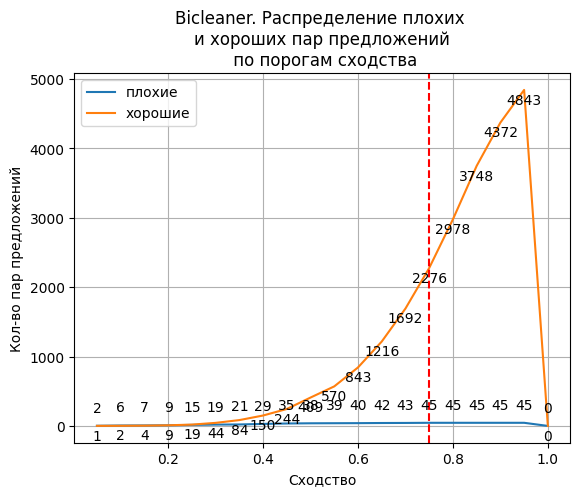

In [ ]:
model = 'bicleaner'
x_value = 0.75

y1 = []
y2 = []
for threshold in x:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    y1.append(round(scores[6], 3))  # class 0 sentences (bad)
    y2.append(round(scores[7], 3))  # class 1 sentences (good)

# plt.figure(figsize=(4, 2))

fig, ax = plt.subplots()
ax.plot(x, y1, label='плохие')
for i, j in zip(x, y1):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, 10), ha='center')
  
ax.plot(x, y2, label='хорошие')
for i, j in zip(x, y2):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, -10), ha='center')

ax.axvline(x=x_value, color='r', linestyle='--')

ax.set_xlabel('Сходство')
ax.set_ylabel('Кол-во пар предложений')
ax.set_title('Bicleaner. Распределение плохих \nи хороших пар предложений\n по порогам сходства')
ax.legend()
ax.grid(True)

plt.show()

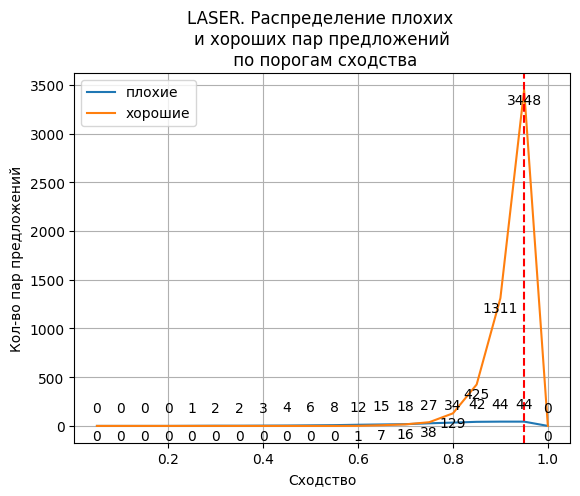

In [ ]:
model = 'laser'
x_value = 0.95
y1 = []
y2 = []
for threshold in x:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    y1.append(round(scores[6], 3))  # class 0 sentences (bad)
    y2.append(round(scores[7], 3))  # class 1 sentences (good)

fig, ax = plt.subplots()
ax.plot(x, y1, label='плохие')
for i, j in zip(x, y1):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, 10), ha='center')
  
ax.plot(x, y2, label='хорошие')
for i, j in zip(x, y2):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, -10), ha='center')

ax.axvline(x=x_value, color='r', linestyle='--')

ax.set_xlabel('Сходство')
ax.set_ylabel('Кол-во пар предложений')
ax.set_title('LASER. Распределение плохих \nи хороших пар предложений\n по порогам сходства')
ax.legend()
ax.grid(True)

plt.show()

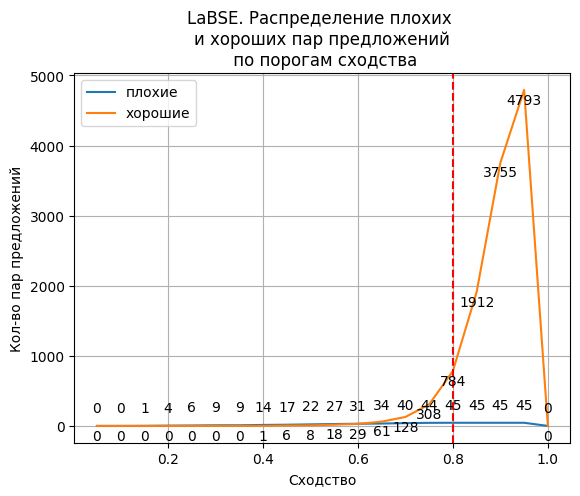

In [ ]:
model = 'labse'
x_value = 0.8
y1 = []
y2 = []
for threshold in x:
    predicted_vs_true_df = get_pred_vs_act_df(sims_df, true_label='label', model=model, threshold=threshold)
    two_way_tab = get_crosstab(predicted_vs_true_df)
    scores = get_scores(two_way_tab)
    y1.append(round(scores[6], 3))  # class 0 sentences (bad)
    y2.append(round(scores[7], 3))  # class 1 sentences (good)

fig, ax = plt.subplots()
ax.plot(x, y1, label='плохие')
for i, j in zip(x, y1):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, 10), ha='center')
  
ax.plot(x, y2, label='хорошие')
for i, j in zip(x, y2):
    ax.annotate(str(round(j, 2)), xy=(i, j), textcoords='offset points', xytext=(0, -10), ha='center')

ax.axvline(x=x_value, color='r', linestyle='--')

ax.set_xlabel('Сходство')
ax.set_ylabel('Кол-во пар предложений')
ax.set_title('LaBSE. Распределение плохих \nи хороших пар предложений\n по порогам сходства')
ax.legend()
ax.grid(True)

plt.show()

# Логистическая регрессия

In [ ]:
# из инетереса - лог. регрессия по трем признакам -- три 
# показателя сходства из трех моделей
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss

X_train, X_test, y_train, y_test = train_test_split(
    sims_df[['bicleaner', 'labse', 'laser']],
    sims_df.label,
    random_state=42
    ) 

clf = LogisticRegression(
    C=5,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.07      0.75      0.13        12
           0       0.58      0.85      0.69        13
           1       1.00      0.90      0.95      1225

    accuracy                           0.90      1250
   macro avg       0.55      0.83      0.59      1250
weighted avg       0.99      0.90      0.94      1250



In [ ]:
# # небольшой перебор параметров
# from sklearn.model_selection import GridSearchCV

# t0 = time()



# parameters = {
#     'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
#     'class_weight': [None, 'balanced']
# }

# gs_clf = GridSearchCV(
#     clf,
#     parameters,
#     scoring='f1_macro',
#     cv=5,
#     n_jobs=-1
# )

# gs_clf = gs_clf.fit(X_train, y_train)

# print(f'Done in {time() - t0} seconds')

# print(gs_clf.best_params_)

# clf = LogisticRegression(
#     C=0.09,
#     class_weight='balanced',
#     max_iter=1000,
#     random_state=42)

# clf.fit(X_train, y_train)

# pred = clf.predict(X_test)

# print(classification_report(y_test, pred))